<a href="https://colab.research.google.com/github/hyeong8465/KTB/blob/main/ktb_ai/ktb_day0712.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
머신러닝 1
- 머신러닝 소개
데이터를 통해 학습하면서 지속적으로 성능을 향상시키는 모델
현업에서는 데이터가 시장에 맞게 변하므로 지속적인 업데이트가 필요하다.
데이터 패턴 분석, 예측과 분류, 자동화된 의사결정 프로세스에 사용된다.

머신러닝 프로세스 진행 전 확인사항
1. 어떤 문제에 대한 어떤 해답을 원하는가?
2. 내가 갖고 있는 데이터에 답이 있는가?
3. 데이터가 충분한가?
4. 어떤 방법이 내 질문을 가장 잘 해결해 줄 수 있는가?
5. 내가 만든 머신러닝 프로세스의 결과를 어떻게 평가할 수 있는가?

numpy, pandas, scikit
머신러닝 모델은 직접 구현보다는 개념을 공부하고 라이브러리 사용을 권장한다.
딥러닝은 직접 구현하는 것 추천.

- 학습방법과 머신러닝
지도학습(선형 회귀, 로지스틱 회귀, 의사결정 나무, k-NN, )
비지도학습(k-mean, PCA, DBSCAN, 계층적 군집화)
    레이블이 없는 데이터에서 패턴이나 구조를 발견
강화학습
    에이전트가 환경과 상호작용하면서 보상을 최대화하는 행동을 학습
    시퀀스 기반의 문제에서 최적의 행동을 찾는데 유리
    변화하는 환경에 대해 지속적으로 학습하고 적응할 수 있음

    학습 과정이 복잡하고 많은 계산 자원이 필요
    적절한 보상 함수를 설계하는 것이 어려울 수 있음
    도전 과제: 보상의 희소성, 고차원 상태 공간, 장기 의존성 문제, 안정성

- 지도학습
회귀
    선형회귀:
분류
    나이브 베이즈: 조건부 확률을 이용한 분류 알고리즘, 독립 변수들이 독립적이라는 가정 하에 작동
    베이즈 정리: 조건부 확률을 통해 사건의 사후 확률을 계산하는 원리

- 모델의 학습과 평가
데이터 분할
    훈련데이터와 테스트 데이터의 분할: 7:3 or 8:2
    분할 방법: 임의 분할 / 층화 분할(클래스 불균형 문제가 있는 경우)
교차검증
    k-Fold Cross-Validation
혼동행렬
    다중 클래스 분류에서도 유용하지만, 이진 분류에서 더 자주 사용
    정확도, 정밀도, 재현율, F1-score (정확도랑 F1을 많이 사용)
    ROC 곡선







'''

# 실습 과제
### 과제 1: 회귀 분석
목표: 특정 변수에 대한 선형 회귀 모델을 구축하고 평가합니다.

데이터셋: California Housing dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 훈련 데이터와 테스트 데이터로 분할합니다.
3. 선형 회귀 모델을 학습시키고, 테스트 데이터에 대해 예측합니다.
4. 예측 결과를 평가하고, MSE와 R^2 점수를 계산합니다.
5. 실제 값과 예측 값을 시각화합니다.

In [4]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# 데이터 로드
california = fetch_california_housing()
california
df = pd.DataFrame(california['data'], columns=california['feature_names'])
y = california['target']

# 데이터 분할
train_x, test_x, train_y, test_y = train_test_split(df, y, test_size=0.3, random_state=42)

# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(train_x, train_y)

# 예측
pred = model.predict(test_x)

# 평가
mse = mean_squared_error(test_y, pred)
r2 = r2_score(test_y, pred)

print(f'MSE: {mse:.2f}')
print(f'R^2: {r2:.2f}')

MSE: 0.53
R^2: 0.60


Text(0.5, 1.0, 'California Housing Prices')

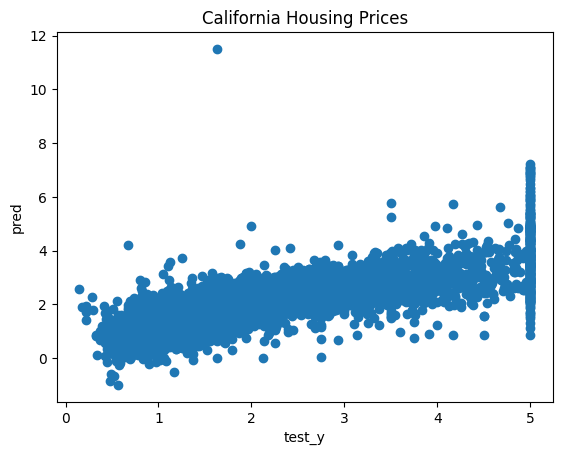

In [30]:
# 시각화
plt.scatter(test_y, pred)
# plt.plot(test_x, pred, color = 'blue', label = 'Predicted')
plt.xlabel('test_y')
plt.ylabel('pred')
plt.title('California Housing Prices')
# 성능이 좋지 않음. 성능이 좋으면 y=x 그래프가 그려져야 됨

### 과제 2: 분류 분석
목표: 특정 데이터에 대한 나이브 베이즈 분류 모델을 구축하고 평가합니다.

데이터셋: Wine dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 훈련 데이터와 테스트 데이터로 분할합니다.
3. 나이브 베이즈 모델을 학습시키고, 테스트 데이터에 대해 예측합니다.
4. 예측 결과를 평가하고, 정확도와 혼동 행렬을 계산합니다.
5. 혼동 행렬을 시각화합니다.


In [35]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [71]:
# 데이터 로드
wine = load_wine()
X = wine.data
y = wine.target

# 데이터 분할
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 학습
model = GaussianNB()
model.fit(train_x, train_y)

# 예측
pred = model.predict(test_x)

# 평가
accuracy = accuracy_score(test_y, pred)
cm = confusion_matrix(test_y, pred)

print(f'Accuracy: {accuracy:.2f}')
print(cm)

Accuracy: 1.00
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


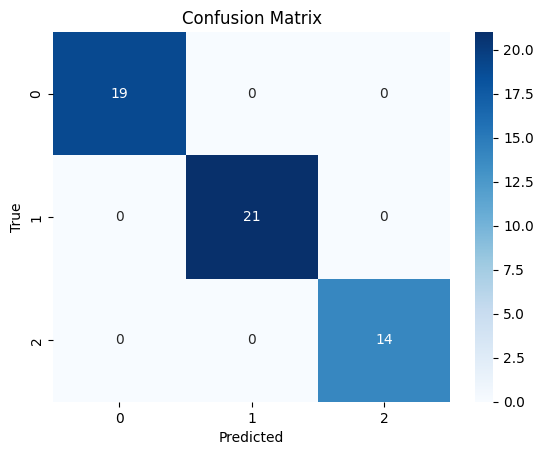

In [37]:
# 시각화
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

###과제 3: 교차 검증

목표: 데이터에 대해 교차 검증을 수행하여 모델 성능을 평가합니다.

데이터셋: Diabetes dataset을 사용합니다. -> 회귀 데이터

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 나이브 베이즈 모델을 사용하여 5-겹 교차 검증을 수행합니다. -> 나이브 베이즈 적절치 않음
3. 교차 검증 점수를 출력하고 평균 점수를 계산합니다.
4. 교차 검증 결과를 시각화합니다.


In [60]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

import matplotlib.pyplot as plt
import sklearn

In [77]:
print(X.shape,y.shape)

(442, 10) (442,)


In [74]:
# 데이터 로드
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# 모델 생성
# model = GaussianNB()
model1 = LinearRegression()
model2 = xgb.XGBRegressor()

# 교차 검증
scores1 = cross_val_score(model1, X, y, cv=5, scoring='neg_mean_squared_error')
scores2 = cross_val_score(model2, X, y, cv=5, scoring='neg_mean_squared_error')

# 교차 검증 점수 출력
print("Cross-validation scores:", scores1)
print("Cross-validation scores:", scores2)


Cross-validation scores: [-2779.92344921 -3028.83633883 -3237.6875877  -3008.74648884
 -2910.21268776]
Cross-validation scores: [-3100.87192163 -3385.49280242 -4709.05217308 -4115.58407585
 -4689.87525552]


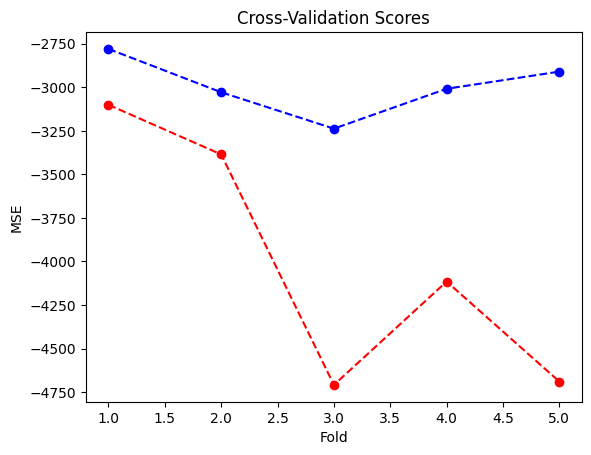

In [70]:
# 시각화
plt.plot(range(1, len(scores1) + 1), scores1, marker='o', linestyle='--', color='b')
plt.plot(range(1, len(scores2) + 1), scores2, marker='o', linestyle='--', color='r')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.title('Cross-Validation Scores')
plt.show()